In [1]:
from pathlib import Path
import random
from PIL import Image

import torchvision.transforms.functional as TF

import repackage
repackage.up()
from inference.predict_function import predict
from preprocessing.process_traning_data import fit_resize, get_black_mask, fit_resize

0it [00:00, ?it/s]

OBS: This script can take some time to run, but can be run multiple instances at the same time.


Grab a few balls.

Åland
3v4cq8_c=(409, 1087)_r=57.png


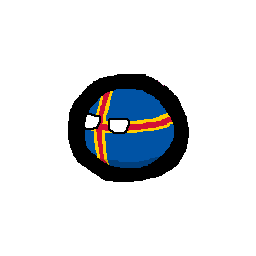

Åland
8og060_c=(526, 4322)_r=62.png


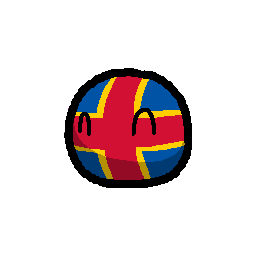

Benin
50q3e3_c=(68, 456)_r=59.png


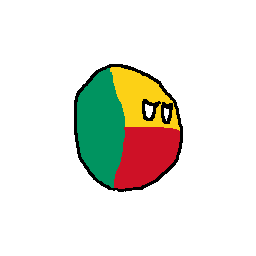

In [2]:
random.seed(7331)

folder = Path(r"..\data\processed_balls_resized")
files = [f for f in folder.glob("**/*.png")]
random.shuffle(files)
files = files[:3]
balls = [Image.open(f) for f in files]
for f, i in zip(files, balls):
    print(f.parent.name)
    print(f.name)
    display(i)

Get each ball's corresponding flags.

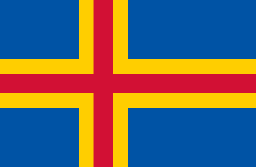

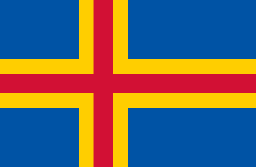

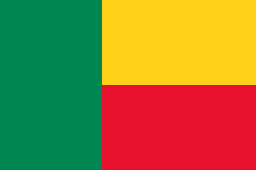

In [3]:
flags = [Image.open(fr"..\data\flags\{f.parent.name}.png") for f in files]
for i in flags:
    display(i.resize((256, 256*i.height//i.width )))

Get each ball's correspo

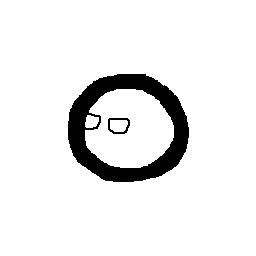

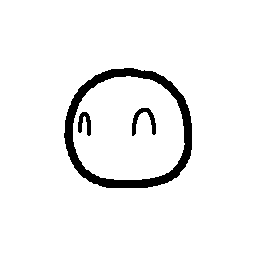

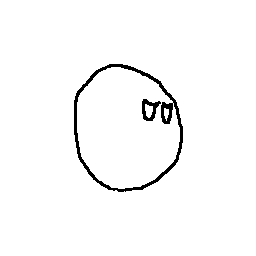

In [4]:
outlines = [Image.fromarray(~get_black_mask(i)) for i in balls]
for i in outlines:
    display(i)

Use flag and outline to reconstruct the original ball.

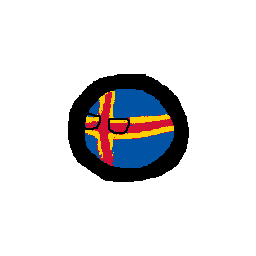

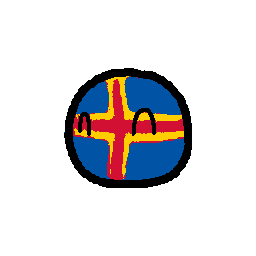

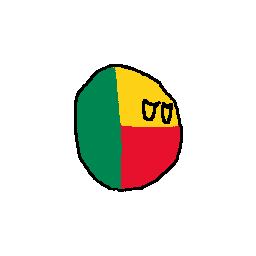

In [5]:
combination = predict(balls, flags, use_M1=True, use_M2=True, quantize_threshold=0.01)
for i in combination:
    display(i)

We can now do this with any flag and any outline.

In [6]:
sweden_flags = 3*[Image.open(fr"..\data\flags\sweden.png")]

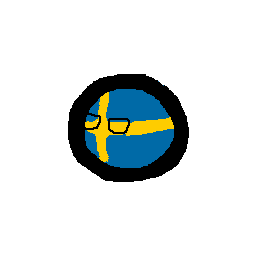

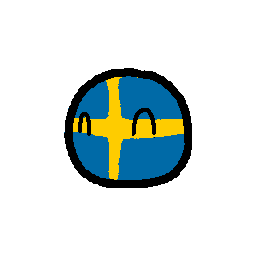

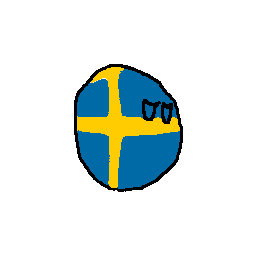

In [7]:
combination = predict(balls, sweden_flags, use_M1=True, use_M2=True, quantize_threshold=0.01)
for i in combination:
    display(i)